# ETL Challenge Joaquín Aravena

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from numpy import *

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.0f}'.format  # Sin decimales y sin separador de miles


In [63]:
def entropia(x): #Con x una porción del dataframe correspondiente a cada localidad
    n = sum(x["total_population"]) #Población total de la localidad
    H = 0
    for i in x.itertuples():
        p = i.total_population/n
        H += p*log2(p)
    H *= -1
    return(H)

## Dataframe Final

In [64]:
#Lectura del csv con sueldos promedio a nivel país y del csv con sueldos y numero de empleados por locación
df_oaw = pd.read_csv("occupations_avg_wage.csv", 
                     encoding="latin1", 
                     sep=",")

df_pone = pd.read_csv("pumas_occupations_num_employees.csv", 
                      encoding="latin1", 
                      sep=",")

In [65]:
#Lectura de csv con valor del peso chileno del 2016 al 2022
d16 = pd.read_csv("Dolar 2016.csv", 
                  sep=";")
d17 = pd.read_csv("Dolar 2017.csv", 
                  sep=";")
d18 = pd.read_csv("Dolar 2018.csv", 
                  sep=";")
d19 = pd.read_csv("Dolar 2019.csv", 
                  sep=";")
d20 = pd.read_csv("Dolar 2020.csv", 
                  sep=";")
d21 = pd.read_csv("Dolar 2021.csv", 
                  sep=";")
d22 = pd.read_csv("Dolar 2022.csv", 
                  sep=";")

años = [d16,d17,d18,d19,d20,d21,d22]

#Lista que contiene el valor promedio del peso chileno en Diciembre para cada año
dolar = []
for año in años:
    dolar.append(float(año.iloc[31,12].replace(",",".")))

In [66]:
#Agrupar según su nombre en el PUMA y calcular el promedio de los datos de la columna con sueldos promedio
df = df_pone.groupby("puma_name")["average_wage"].mean().reset_index()

df.rename(columns={"average_wage" : "average_location_wage"}, 
          inplace=True)

In [67]:
#Identificar indices de sueldos con mayor valor en cada localidad, convirtiendolo en lista
indices = list(df_pone.groupby("puma_name")["average_wage"].idxmax())

#Crear dataframe unicamente con los datos que cumplen ser el sueldo de mayor valor en dicha localidad
df_pone_max = df_pone.loc[indices, ["puma_name", "occupation_name", "average_wage"]]

df_pone_max.rename(columns={"average_wage" : "max_wage", 
                            "occupation_name" : "occupation_w_max_wage"}, 
                            inplace=True)

#Juntar ambos dataframe
df = pd.merge(df, df_pone_max)

In [68]:
#Creamos un nuevo dataframe para no modificar el original.
#Se descarta la columna de ID de la profesión y se cambian los nombres a nuestra conveniencia para el merge
df_oaw2 = df_oaw.drop(columns="ID Detailed Occupation")

df_oaw2.rename(columns={"Detailed Occupation" : "occupation_w_max_wage", 
                        "Average Wage" : "average_national_wage"}, 
                        inplace=True)

In [69]:
#Se junta el dataframe final con el modificado anteriormente, y se ordenan de acuerdo al sueldo promedio de la localidad
df = pd.merge(df, df_oaw2)
df.sort_values(by="average_location_wage",
               inplace=True,
               ascending=False)

df = df.reset_index(drop=True)

In [70]:
df

,puma_name,average_location_wage,occupation_w_max_wage,max_wage,average_national_wage
0,"Inner Mission & Castro PUMA, CA",96421,Surgeons,572400,282720
1,"Battery Park City, Greenwich Village & Soho PU...",94839,Dentists,668644,127708
2,"Chelsea, Clinton & Midtown Business District P...",91591,Other financial specialists,668644,98081
3,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380,Industrial production managers,572400,77306
4,"Essex County (Northwest) PUMA, NJ",84130,Insurance sales agents,645343,53855
...,...,...,...,...,...
2373,"Carr 3 (Sureste) PUMA, PR",18646,Broadcast announcers and radio disc jockeys,75982,47494
2374,"Carr 2 (Norte) PUMA, PR",17486,Purchasing managers,71930,74013
2375,"Carr 2 (Suroeste) PUMA, PR",16361,Pharmacists,182357,88632
2376,"Carr 2 (Sur) PUMA, PR",15806,Pharmacists,72364,88632


## Bonus 1: Sueldos en CLP

In [71]:
#Nuevo dataframe donde estarán las columnas de con valores monetarios en pesos chilenos
#Los valores se determinaron mas arriba. El indice 6 viene del año 2022
dfbonus = df.copy()
dfbonus["average_location_wage (CLP)"] = df["average_location_wage"]*dolar[6]
dfbonus["max_wage (CLP)"] = df["max_wage"]*dolar[6]
dfbonus["average_national_wage (CLP)"] = df["average_national_wage"]*dolar[6]
dfbonus

,puma_name,average_location_wage,occupation_w_max_wage,max_wage,average_national_wage,average_location_wage (CLP),max_wage (CLP),average_national_wage (CLP)
0,"Inner Mission & Castro PUMA, CA",96421,Surgeons,572400,282720,84431989,501227623,247566879
1,"Battery Park City, Greenwich Village & Soho PU...",94839,Dentists,668644,127708,83046935,585504805,111828613
2,"Chelsea, Clinton & Midtown Business District P...",91591,Other financial specialists,668644,98081,80202268,585504828,85885371
3,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380,Industrial production managers,572400,77306,74763925,501227612,67693757
4,"Essex County (Northwest) PUMA, NJ",84130,Insurance sales agents,645343,53855,73668964,565100910,47158395
...,...,...,...,...,...,...,...,...
2373,"Carr 3 (Sureste) PUMA, PR",18646,Broadcast announcers and radio disc jockeys,75982,47494,16327470,66534646,41588713
2374,"Carr 2 (Norte) PUMA, PR",17486,Purchasing managers,71930,74013,15312059,62986127,64810308
2375,"Carr 2 (Suroeste) PUMA, PR",16361,Pharmacists,182357,88632,14326341,159683124,77611801
2376,"Carr 2 (Sur) PUMA, PR",15806,Pharmacists,72364,88632,13840671,63366323,77611801


## Bonus 2

In [72]:
dfbonus["entropy"] = 0
localidades = df_pone["puma_name"].unique()
for i in localidades:
    df_localidad = df_pone[df_pone["puma_name"] == i]
    H = entropia(df_localidad)
    dfbonus.loc[dfbonus["puma_name"] == i, "entropy"] = H

dfbonus["entropy"] = dfbonus["entropy"].apply(lambda x: format(x, '.2f'))
dfbonus

,puma_name,average_location_wage,occupation_w_max_wage,max_wage,average_national_wage,average_location_wage (CLP),max_wage (CLP),average_national_wage (CLP),entropy
0,"Inner Mission & Castro PUMA, CA",96421,Surgeons,572400,282720,84431989,501227623,247566879,6.79
1,"Battery Park City, Greenwich Village & Soho PU...",94839,Dentists,668644,127708,83046935,585504805,111828613,6.52
2,"Chelsea, Clinton & Midtown Business District P...",91591,Other financial specialists,668644,98081,80202268,585504828,85885371,6.70
3,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380,Industrial production managers,572400,77306,74763925,501227612,67693757,6.47
4,"Essex County (Northwest) PUMA, NJ",84130,Insurance sales agents,645343,53855,73668964,565100910,47158395,7.05
...,...,...,...,...,...,...,...,...,...
2373,"Carr 3 (Sureste) PUMA, PR",18646,Broadcast announcers and radio disc jockeys,75982,47494,16327470,66534646,41588713,5.81
2374,"Carr 2 (Norte) PUMA, PR",17486,Purchasing managers,71930,74013,15312059,62986127,64810308,6.17
2375,"Carr 2 (Suroeste) PUMA, PR",16361,Pharmacists,182357,88632,14326341,159683124,77611801,6.42
2376,"Carr 2 (Sur) PUMA, PR",15806,Pharmacists,72364,88632,13840671,63366323,77611801,6.03


## Gráficos

In [73]:
#Creamos un nuevo dataframe que contendrá el estado al que pertenece cada locación
df2 = df.copy()
df2["state"] = df["puma_name"].str.findall(r'\b([A-Z]{2})\b')
df2["state"] = df2["state"].apply(lambda x: x[-1] if x else None) #Hay estados repetidos en los nombres, agarra el último que es el válido

In [74]:
#Creamos una copia de df_pone para agregar la columna de estado
df_pone2 = df_pone.copy()
df_pone2["state"] = df_pone["puma_name"].str.findall(r'\b([A-Z]{2})\b')
df_pone2["state"] = df_pone2["state"].apply(lambda x: x[-1] if x else None)

#Creamos una copia de df_pone2 para calcular la población total del estado (de nuestros datos)
df_pone3 = df_pone2.drop(columns=["puma_id","puma_name","occupation_id","average_wage","occupation_name"])
df_pone3 = df_pone3.groupby("state")["total_population"].sum().reset_index()
df_pone3.sort_values(by="total_population",
                     ascending=False,
                     inplace=True)

#Dicha población total por estado se añade a df2
df2 = pd.merge(df2,df_pone3)
df2

,puma_name,average_location_wage,occupation_w_max_wage,max_wage,average_national_wage,state,total_population
0,"Inner Mission & Castro PUMA, CA",96421,Surgeons,572400,282720,CA,22885872
1,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380,Industrial production managers,572400,77306,CA,22885872
2,"San Mateo (North), Burlingame & Millbrae Citie...",82798,Surgeons,572400,282720,CA,22885872
3,"Menlo Park, East Palo Alto Cities & Atherton T...",81602,"Miscellaneous social scientists, including sur...",572400,47659,CA,22885872
4,Rancho Santa Margarita City (East) & Ladera Ra...,80663,Firstline supervisors of housekeeping & janito...,572400,30437,CA,22885872
...,...,...,...,...,...,...,...
2373,"Carr 3 (Sureste) PUMA, PR",18646,Broadcast announcers and radio disc jockeys,75982,47494,PR,1210903
2374,"Carr 2 (Norte) PUMA, PR",17486,Purchasing managers,71930,74013,PR,1210903
2375,"Carr 2 (Suroeste) PUMA, PR",16361,Pharmacists,182357,88632,PR,1210903
2376,"Carr 2 (Sur) PUMA, PR",15806,Pharmacists,72364,88632,PR,1210903


### Gráfico de sueldo promedio de las 6 profesiones con mayor sueldo en los 10 estados con la mayor cantidad de población

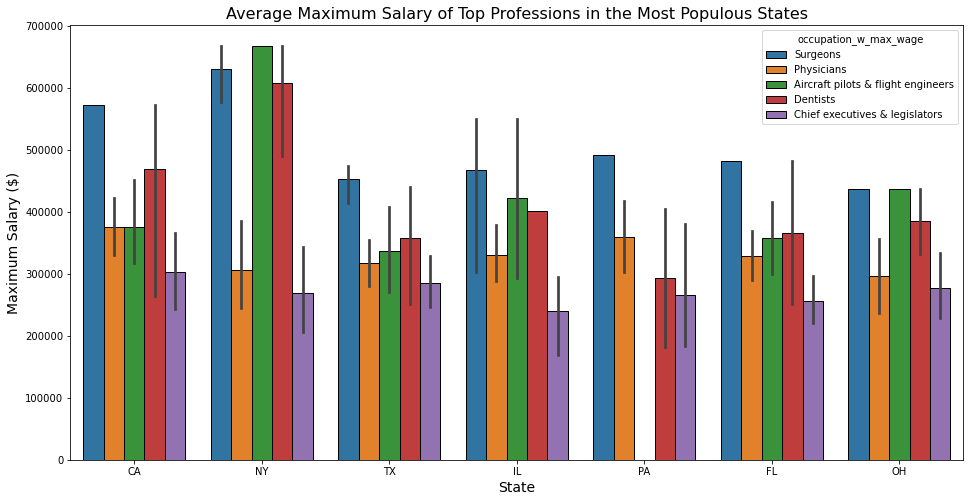

In [75]:
# Se crea una lista con los 10 estados con mayor población según los datos
l = list(df_pone3.head(7)["state"])

# Se crea un dataframe únicamente con dichos 10 estados
dftopp = df2[df2["state"].isin(l)]

# Se crea una segunda lista con las 6 profesiones cno mayor sueldo en dichos estados
l2 = list(dftopp["occupation_w_max_wage"].value_counts().head(5).index)
dftopp = dftopp[dftopp["occupation_w_max_wage"].isin(l2)]

plt.figure(figsize=(16, 8))
sns.barplot(data=dftopp, 
            x="state", 
            y="max_wage", 
            hue="occupation_w_max_wage", 
            edgecolor="black")
plt.title("Average Maximum Salary of Top Professions in the Most Populous States", 
          fontsize=16)
plt.xlabel("State", 
           fontsize=14)
plt.ylabel("Maximum Salary ($)", 
           fontsize=14)

# Mostrar el gráfico
plt.show()


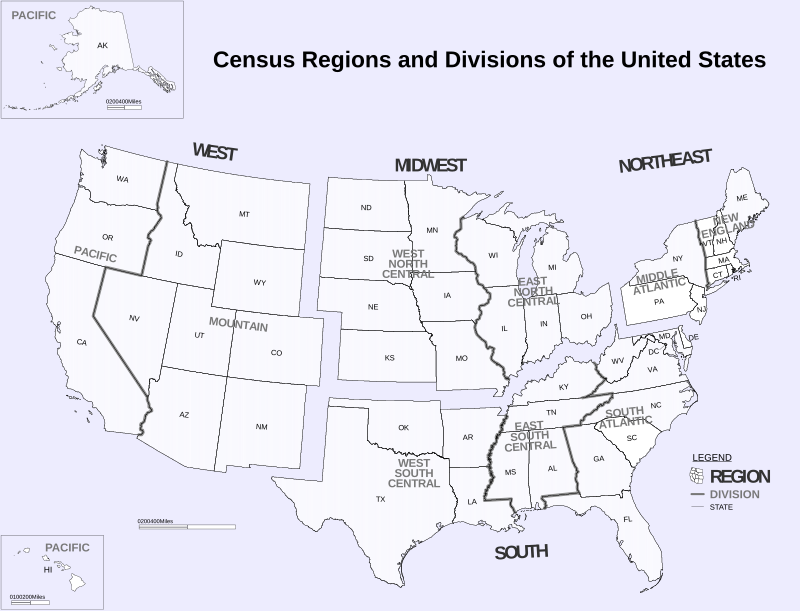

In [76]:
#Lista de estados
estados = df2["state"].unique()

#Lista de estados separados por zona geografica
northeast = ["CT", "ME", "MA", "NH", "RI", "VT", "NY", "PA", "NJ"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "FL", "GA", "KY", "LA", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV", "DC", "DE", "MD"]
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
df2["regional_division"] = df2["state"].apply(lambda x: 
                                  "Northeast" if x in northeast else
                                  "Midwest" if x in midwest else
                                  "South" if x in south else
                                  "West" if x in west else
                                  x)

In [77]:
#Copia de df_pone2 para calcular la población de cada locación
df_pone4 = df_pone2.drop(columns=["puma_id","state","occupation_id","average_wage","occupation_name"])
df_pone4 = df_pone4.groupby("puma_name")["total_population"].sum().reset_index()
df_pone4.rename(columns={"total_population" : "location_population"}, inplace=True)

#Dicha columna de agrega al df2
df2 = pd.merge(df2,df_pone4)

In [78]:
fig = px.treemap(df2, 
                 path=["state", "occupation_w_max_wage"],
                 values="max_wage", 
                 title="Treemap of Maximum Salary by State and Profession",  
                 color="max_wage",
                 color_continuous_scale="Viridis",
                 width=700, 
                 height=600, 
                 labels={"state": "State", 
                         "occupation_w_max_wage": "Occupation", 
                         "max_wage": "Maximum Salary ($)"})  

fig.show()
